In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from statistics import mean

In [3]:
def loadCSV(filename):
    file = filename
    if '.csv' not in filename:
        file += '.csv'
    data = pd.read_csv(file, encoding = 'ISO-8859-1')
    return data

In [4]:
csvFile = 'altered_hate_speech'

In [5]:
data = loadCSV(csvFile)

In [6]:
data.head()

,tweet_text,confidence,tweet_class
0,Warning: penny boards will make you a faggot,0.6013,1
1,Fuck dykes,0.7227,2
2,@sizzurp__ @ILIKECATS74 @yoPapi_chulo @brandon...,0.5229,2
3,"""@jayswaggkillah: ""@JacklynAnnn: @jayswaggkill...",0.5184,2
4,@Zhugstubble You heard me bitch but any way I'...,0.5185,1


# Filter Data Sets By Tweet-Class and Confidence

In [7]:
neutral_hist, offensive_hist, hate_hist, all_hist = {}, {}, {}, {}

In [8]:
def makeSeries():
    neutral_count, offensive_count, hate_count, all_count = 0, 0, 0, 0
    for index, row in data.iterrows():
        tweet_conf = row[1]
        tweet_class = row[2]

        if tweet_class == 0:
            neutral_hist[neutral_count] = tweet_conf
            neutral_count += 1
        elif tweet_class == 1:
            offensive_hist[offensive_count] = tweet_conf
            offensive_count += 1
        elif tweet_class == 2:
            hate_hist[hate_count] = tweet_conf
            hate_count += 1
        
        all_hist[all_count] = tweet_conf
        all_count += 1
            
    neutral_series = pd.Series(neutral_hist, neutral_hist.keys())
    offensive_series = pd.Series(offensive_hist, offensive_hist.keys())
    hate_series = pd.Series(hate_hist, hate_hist.keys())
    all_series = pd.Series(all_hist, all_hist.keys())

    return neutral_series, offensive_series, hate_series, all_series

In [9]:
neutral_series, offensive_series, hate_series, all_series = makeSeries()

# Plot the Series of Data for Each Tweet-Class

In [10]:
def plotData(data, tweet_class='all'):
    data.plot.hist(grid=True, bins=4, rwidth = 0.9, color='#607C8E')
    if tweet_class == 0:
        plt.title('Neutral')
    elif tweet_class == 1:
        plt.title('Offensive')
    elif tweet_class == 2:
        plt.title('Hate')
    elif tweet_class == 'all':
        plt.title('All')
    plt.xlabel('Confidence')
    plt.ylabel('Count')
    plt.grid(axis='y', alpha=0.75)
    

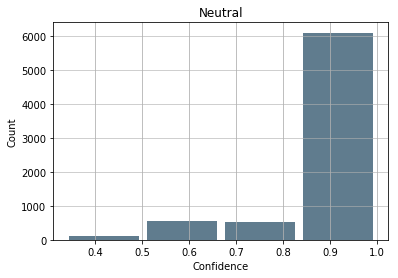

In [11]:
plotData(neutral_series, 0)

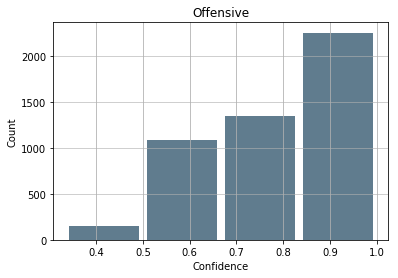

In [12]:
plotData(offensive_series, 1)

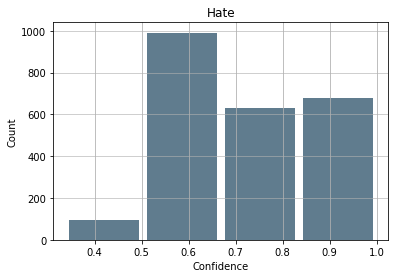

In [13]:
plotData(hate_series, 2)

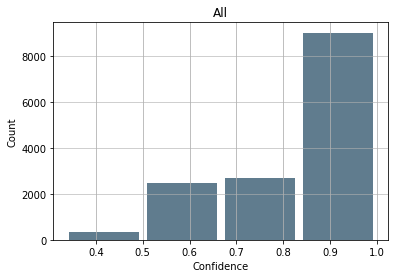

In [14]:
plotData(all_series)

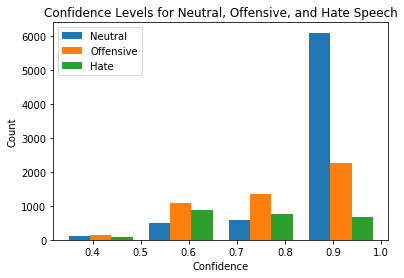

In [15]:
names = ['Neutral', 'Offensive', 'Hate']
plt.hist([list(neutral_hist.values()), list(offensive_hist.values()), list(hate_hist.values())], 4, histtype='bar', label=names)
plt.legend()
plt.title('Confidence Levels for Neutral, Offensive, and Hate Speech')
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.show()

# Calculate Average Confidence for Each Tweet-Class

In [16]:
neutral_avg_conf = mean(neutral_hist.values())
offensive_avg_conf = mean(offensive_hist.values())
hate_avg_conf = mean(hate_hist.values())
all_avg_conf = mean(all_hist.values())

In [17]:
neutral_avg_conf

0.9405874896893044

In [18]:
offensive_avg_conf

0.8125090157154673

In [19]:
hate_avg_conf

0.7467312213422259

In [20]:
all_avg_conf

0.865844317320284